In [1]:
import torch
import sys
import os
sys.path.append(os.path.abspath("..")) 

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
print(f'Using device: {device}')

from dataloader.dataloader import load_MNIST_data,load_CINIC10_data,load_CIFAR10_data,load_Fmnist_data
from train.training import train_nomal,train_for_DEQ
from train.evaluate import plot_loss_curve,plot_errorbar_losscurve,plot_confusion_matrix,plot_histograms,create_table,save_csv,convergence_verify,auto_git_push

Using device: cpu


1/5th Epoch:10/10(100.00%) 

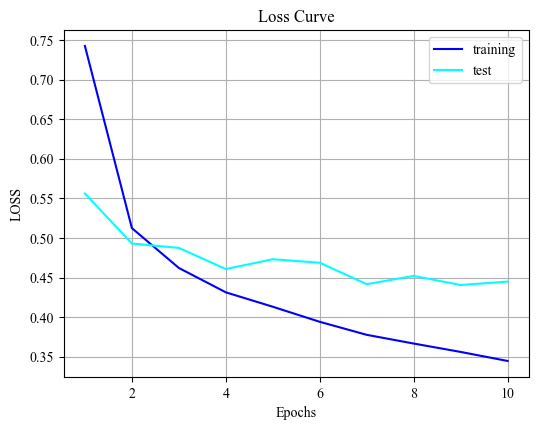

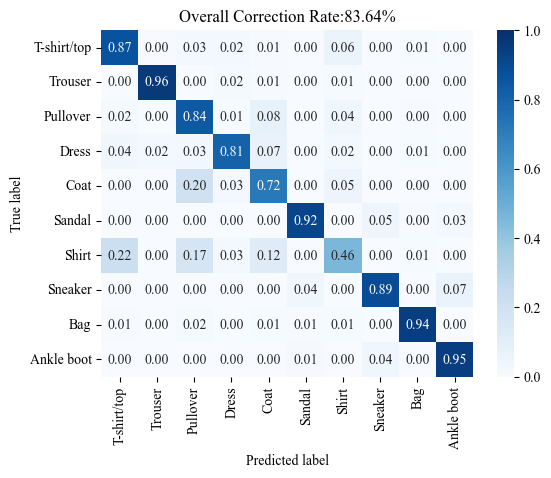

2/5th Epoch:10/10(100.00%) 

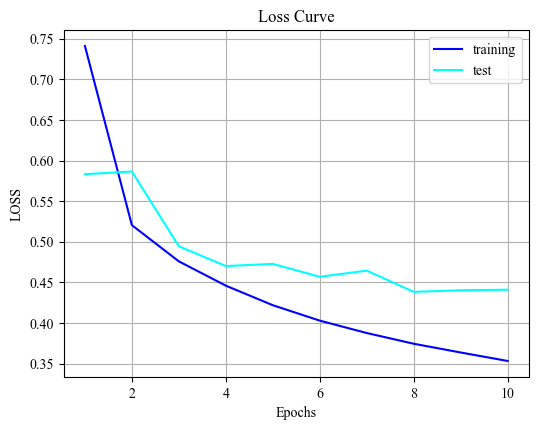

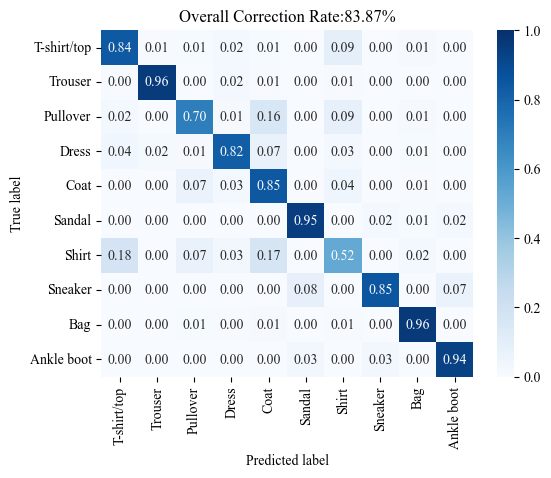

3/5th Epoch:10/10(100.00%) 

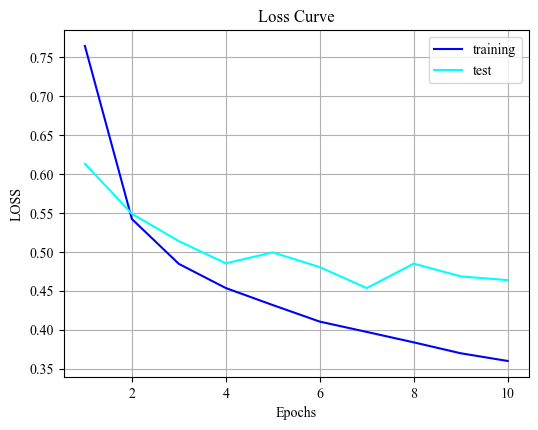

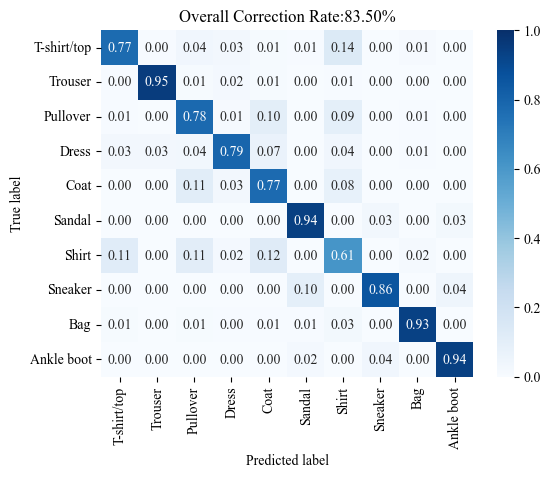

4/5th Epoch:10/10(100.00%) 

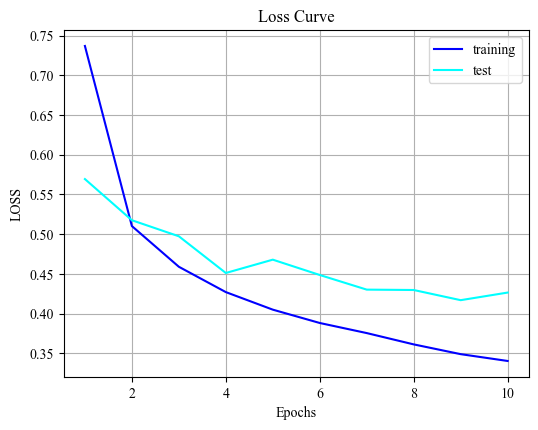

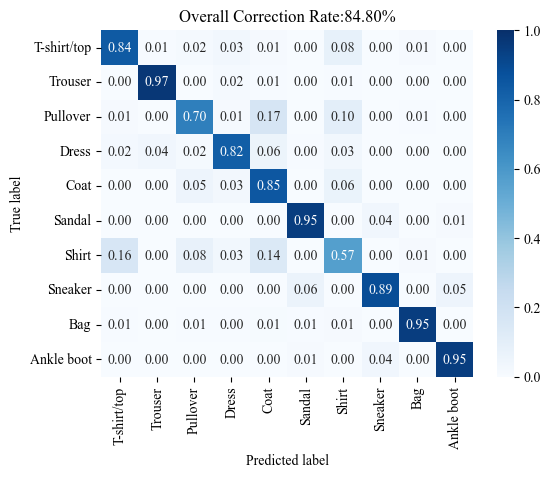

5/5th Epoch:10/10(100.00%) 

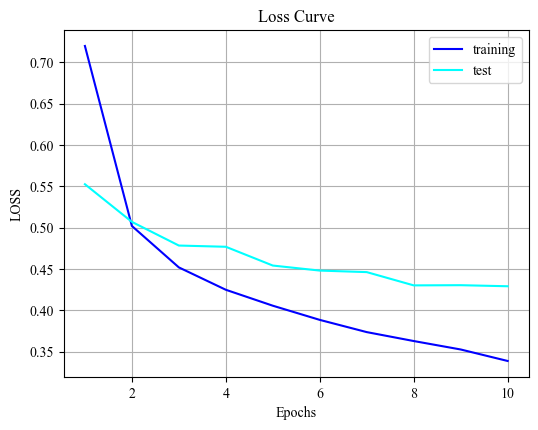

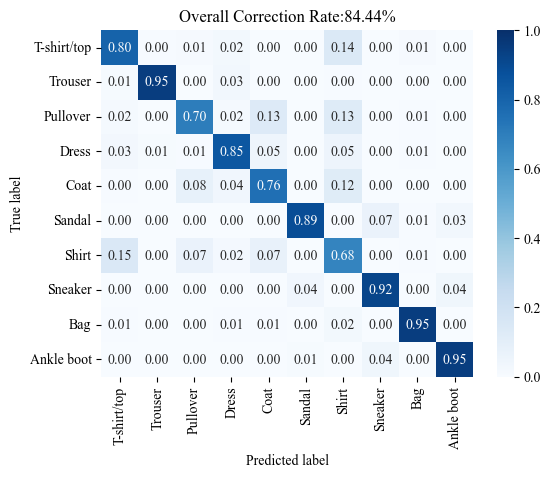

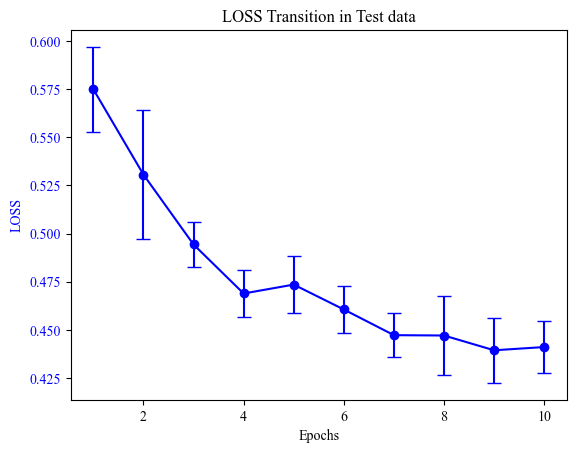

            Average  Best ID       Best  Worst ID       Worst
0   ACC   84.050000        4  84.800000         3   83.500000
1  LOSS    0.441136        4   0.426595         3    0.463776
2  TIME  106.565904        1  74.903563         5  120.958980
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist/PM_CNN_6190152.csv


In [2]:
#data---------------------------------------------
dataset = 'fashion-mnist' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'PM' # 'none', 'MZM', 'LI'
cls_type = 'CNN' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 5
max_epochs = 10
leverage = 8 #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

    All_loss_test.append(loss_test_)
    All_pro_time.append(sum(pro_time_))
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)

1/5th Epoch:1/10(1.67%) 

----------------------Running with leverage: 1----------------------


1/5th Epoch:10/10(100.00%) 

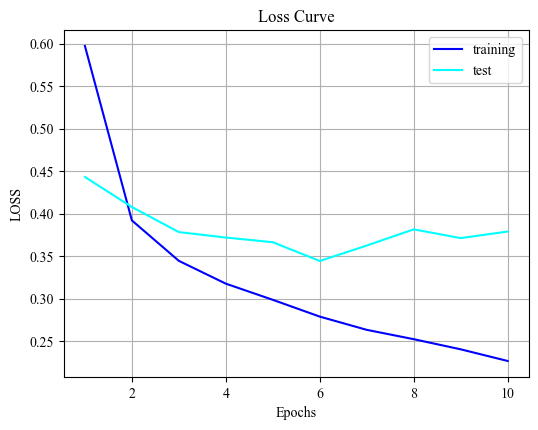

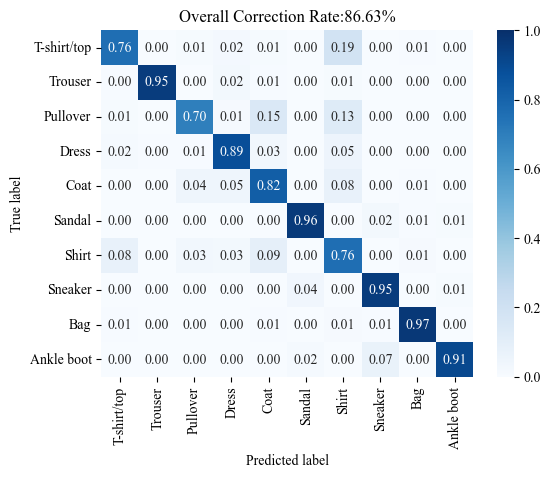

2/5th Epoch:10/10(100.00%) 

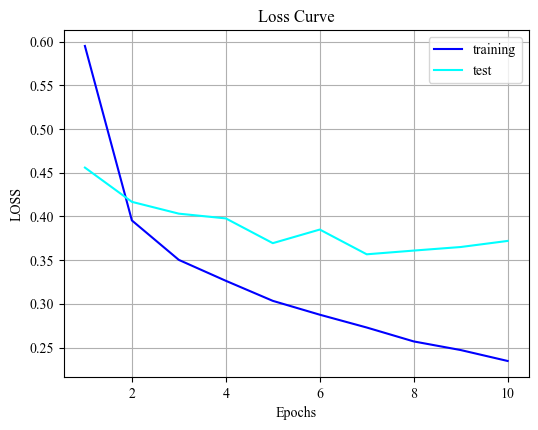

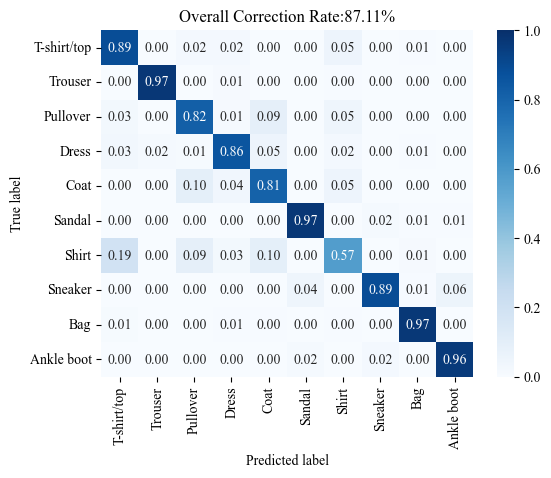

3/5th Epoch:10/10(100.00%) 

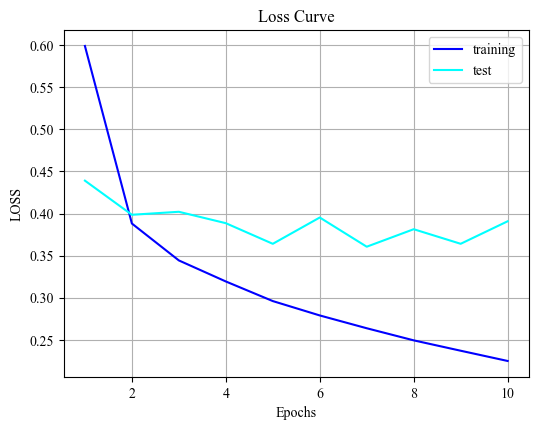

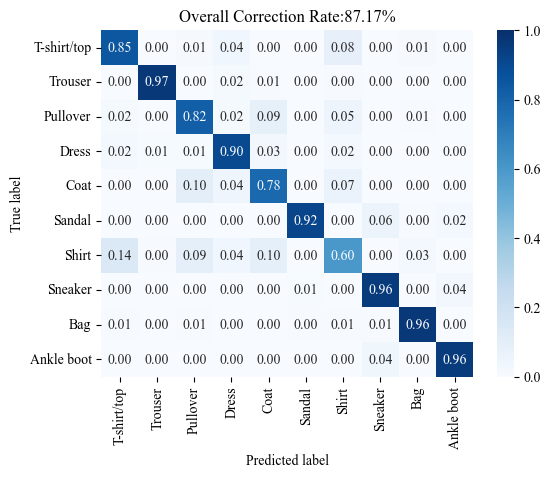

4/5th Epoch:10/10(100.00%) 

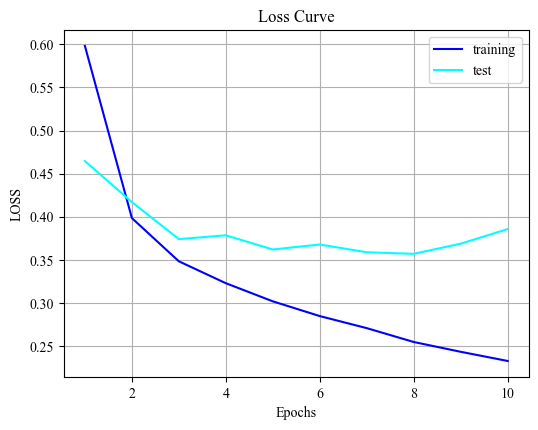

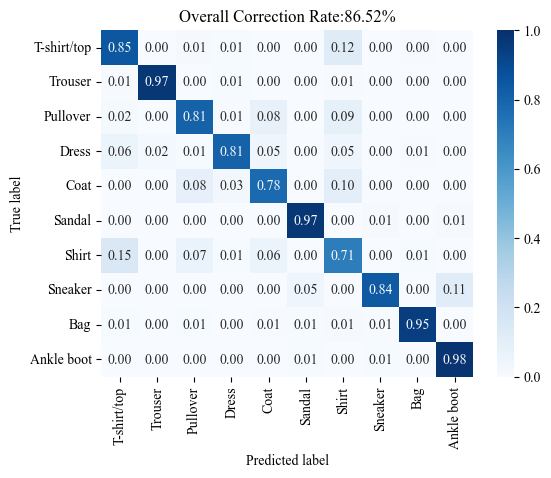

5/5th Epoch:10/10(100.00%) 

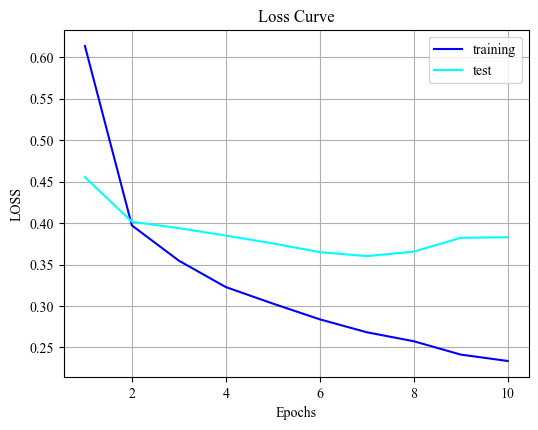

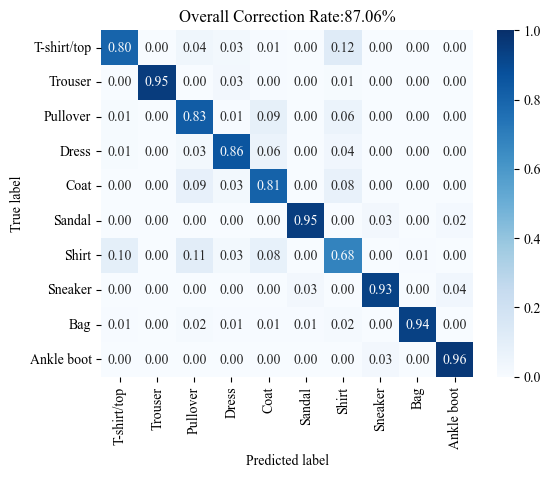

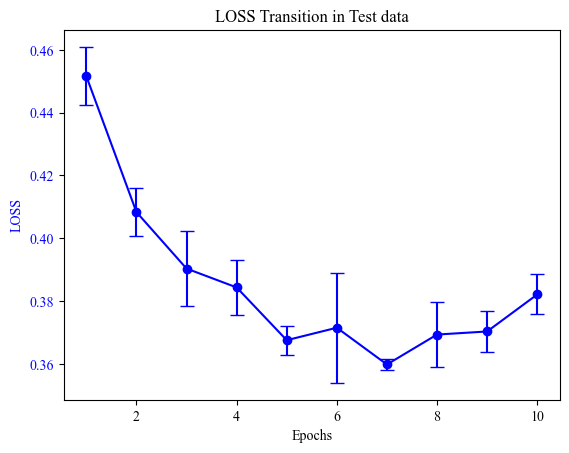

1/5th Epoch:1/10(1.33%) 

            Average  Best ID       Best  Worst ID       Worst
0   ACC   86.898000        3  87.170000         4   86.520000
1  LOSS    0.382087        2   0.371979         3    0.390837
2  TIME  121.090232        1  93.447618         3  136.599230
----------------------Running with leverage: 2----------------------


1/5th Epoch:10/10(100.00%) 

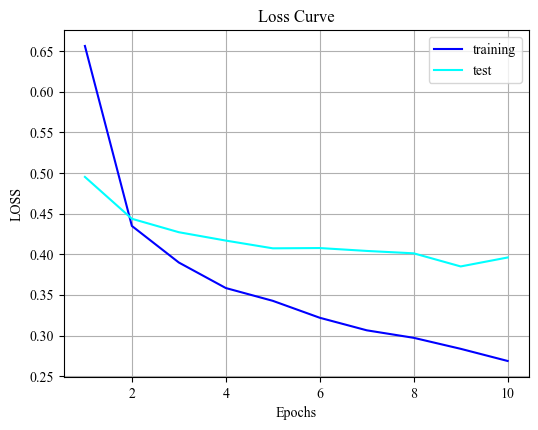

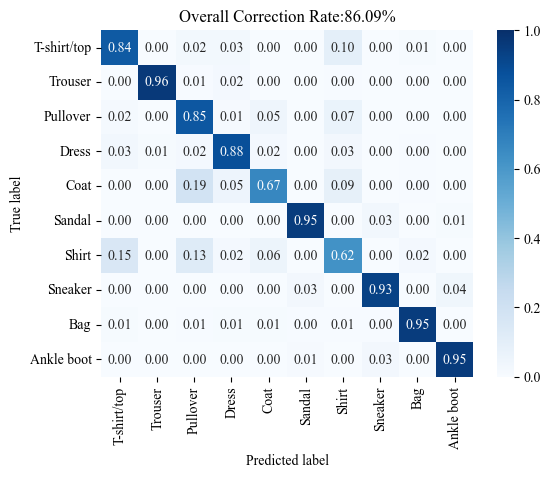

2/5th Epoch:10/10(100.00%) 

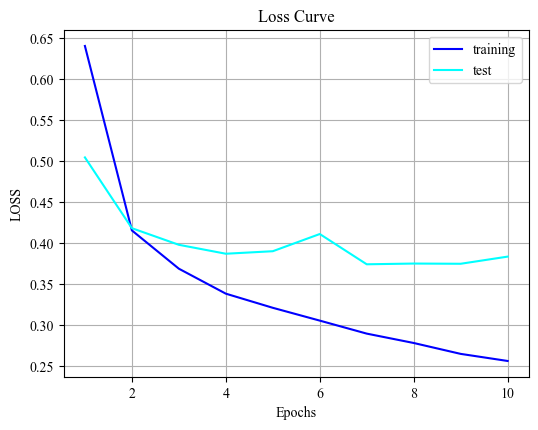

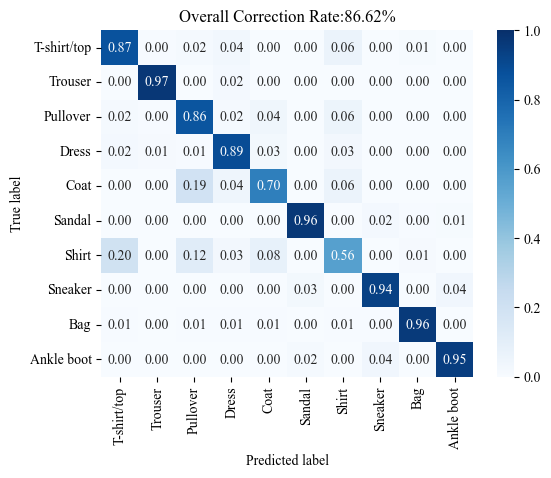

3/5th Epoch:10/10(100.00%) 

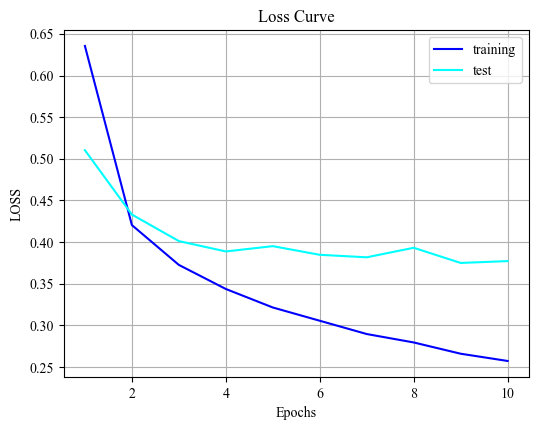

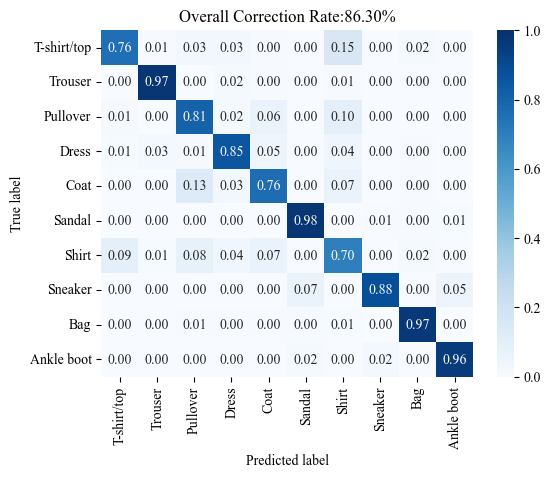

4/5th Epoch:10/10(100.00%) 

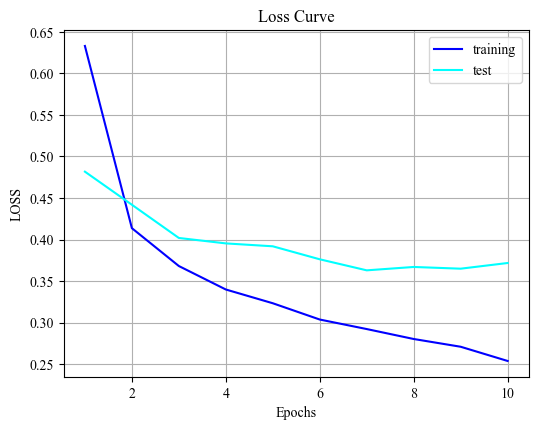

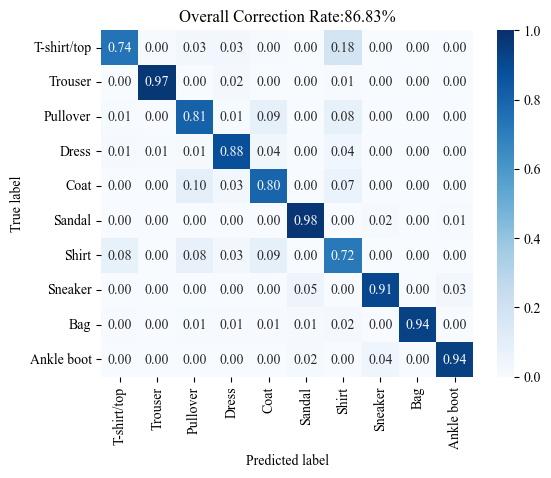

5/5th Epoch:10/10(100.00%) 

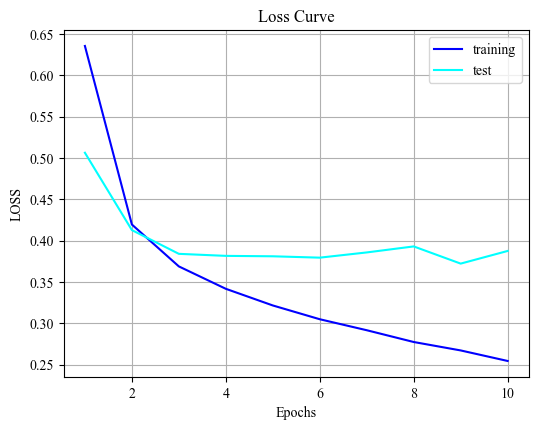

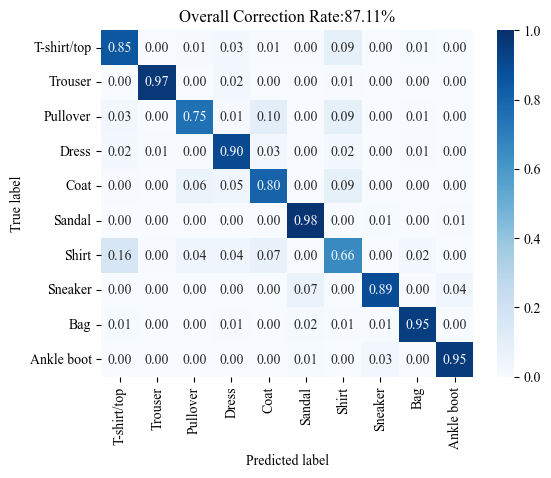

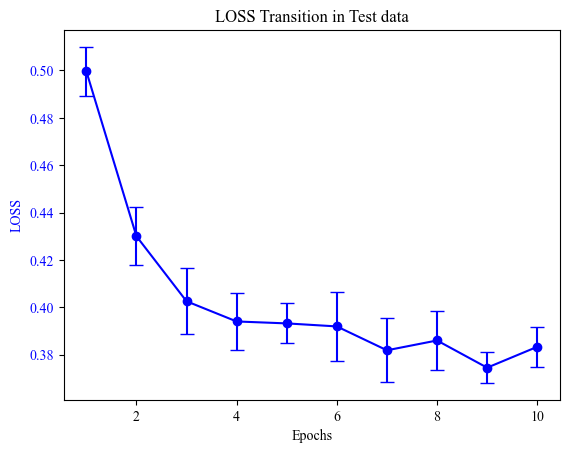

1/5th Epoch:1/10(1.00%) 

            Average  Best ID        Best  Worst ID       Worst
0   ACC   86.590000        5   87.110000         1   86.090000
1  LOSS    0.383274        4    0.371763         1    0.395993
2  TIME  124.434134        4  122.219817         2  126.610468
----------------------Running with leverage: 4----------------------


1/5th Epoch:10/10(100.00%) 

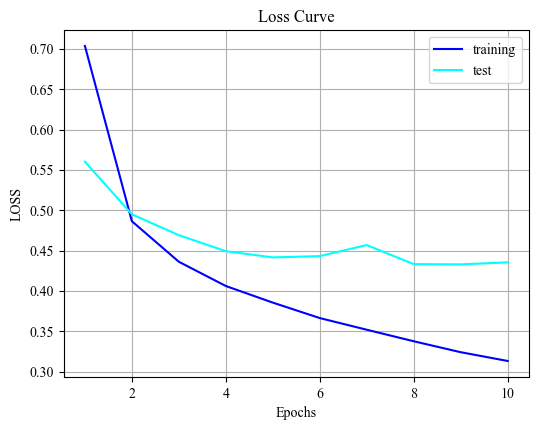

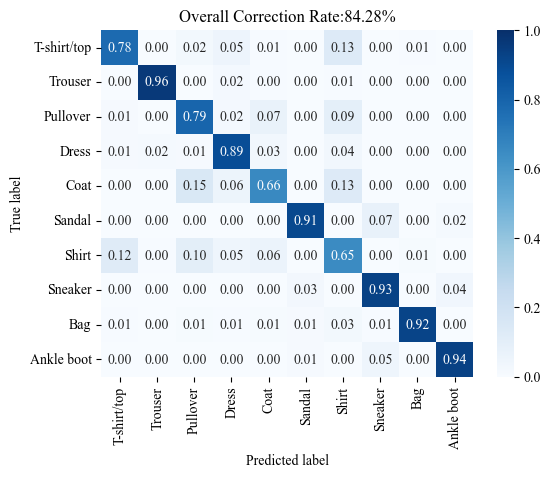

2/5th Epoch:10/10(100.00%) 

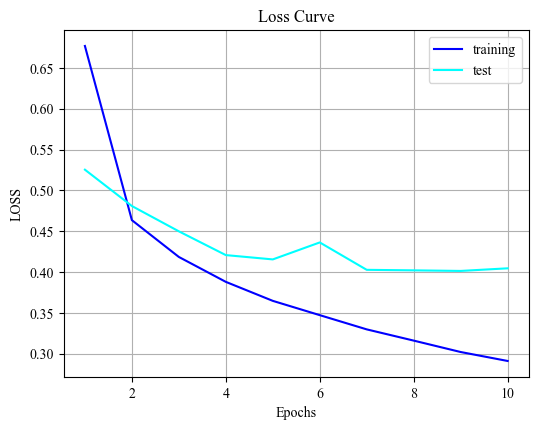

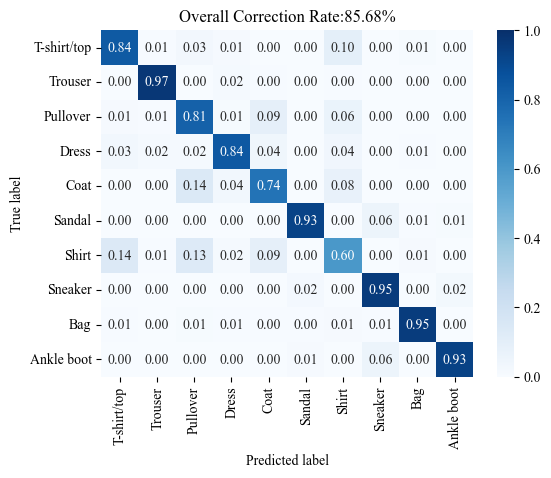

3/5th Epoch:10/10(100.00%) 

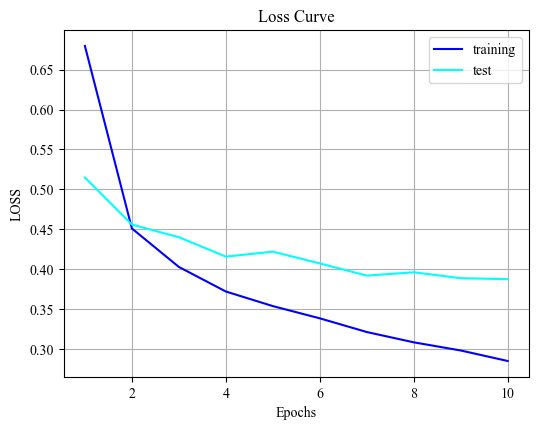

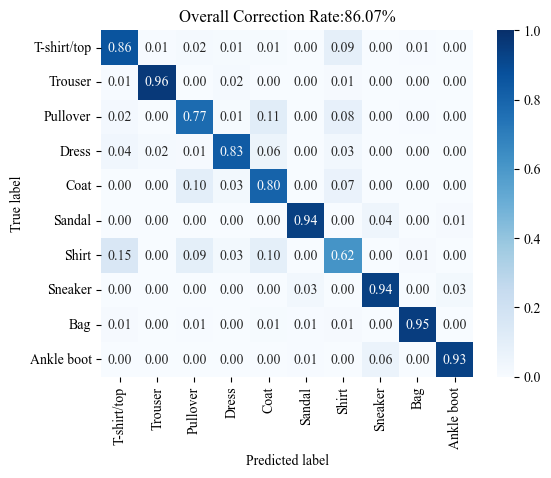

4/5th Epoch:10/10(100.00%) 

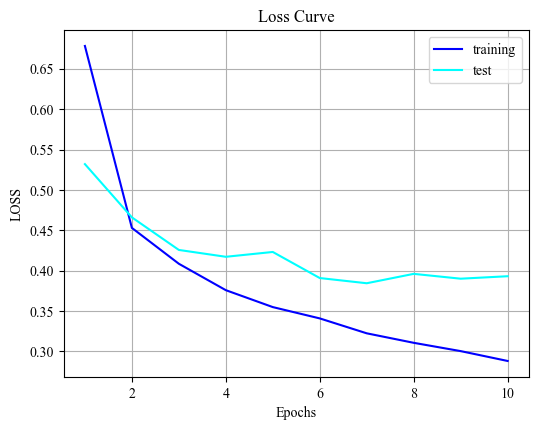

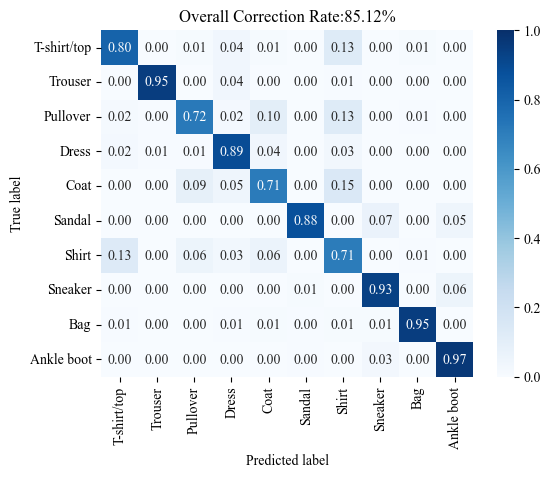

5/5th Epoch:10/10(100.00%) 

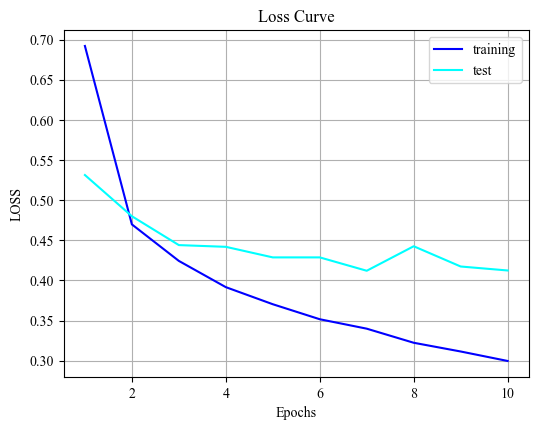

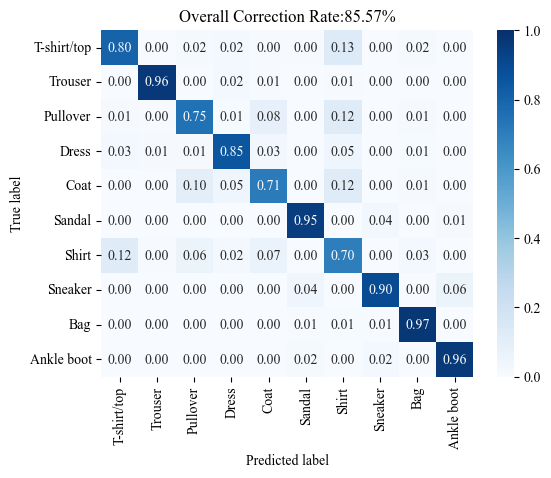

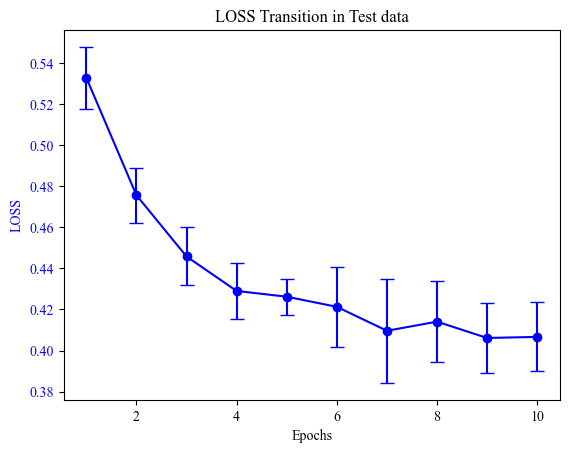

1/5th Epoch:1/10(1.00%) 

            Average  Best ID        Best  Worst ID       Worst
0   ACC   85.344000        3   86.070000         1   84.280000
1  LOSS    0.406638        3    0.387744         1    0.435322
2  TIME  135.436007        2  118.258687         5  155.756080
----------------------Running with leverage: 8----------------------


1/5th Epoch:10/10(100.00%) 

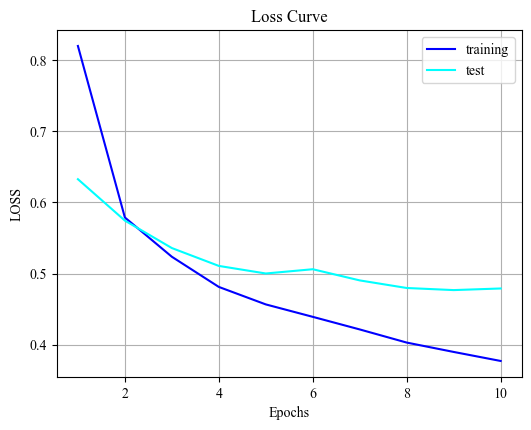

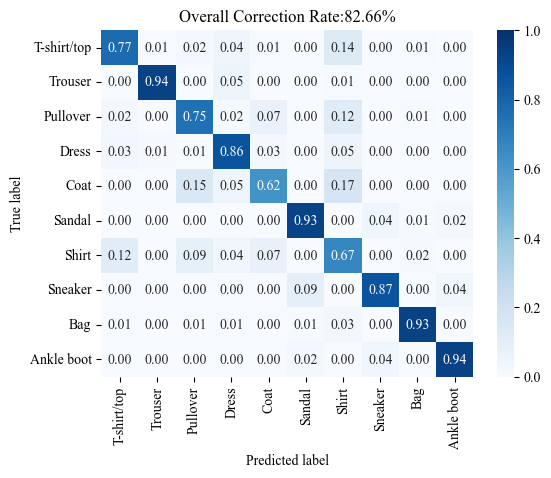

2/5th Epoch:10/10(100.00%) 

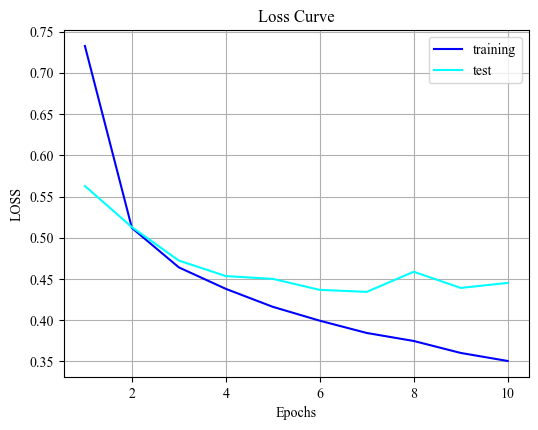

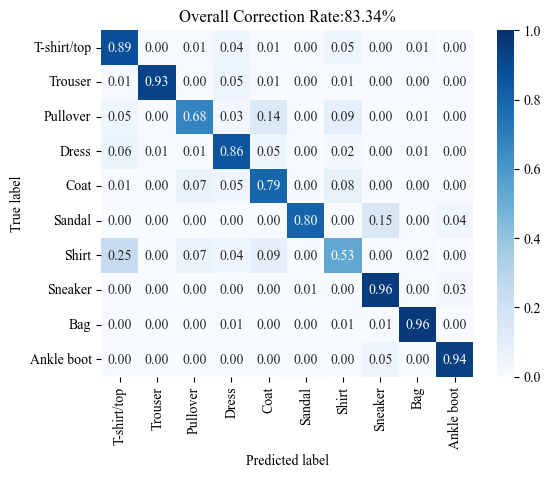

3/5th Epoch:10/10(100.00%) 

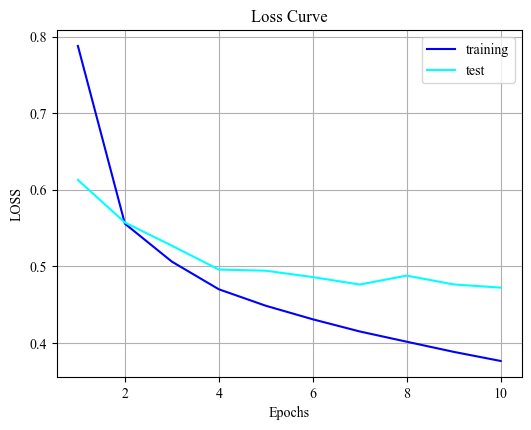

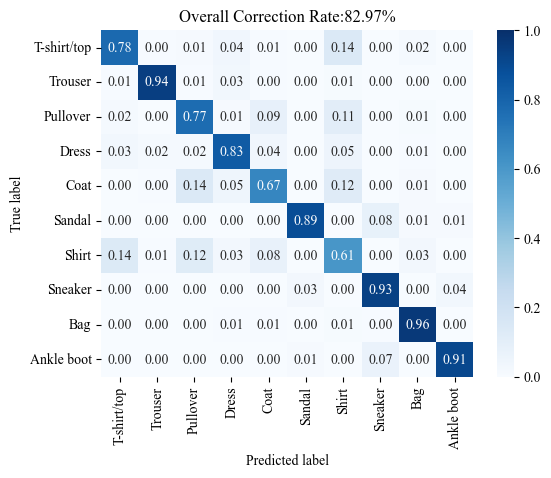

4/5th Epoch:10/10(100.00%) 

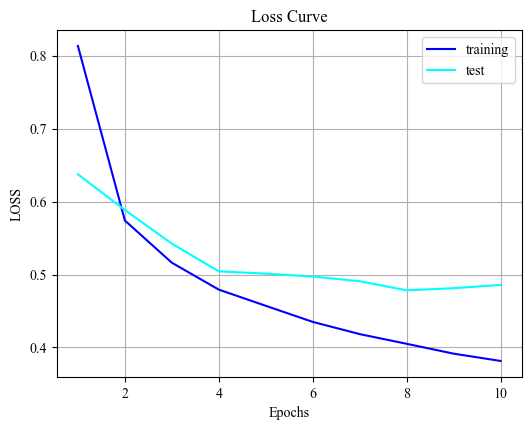

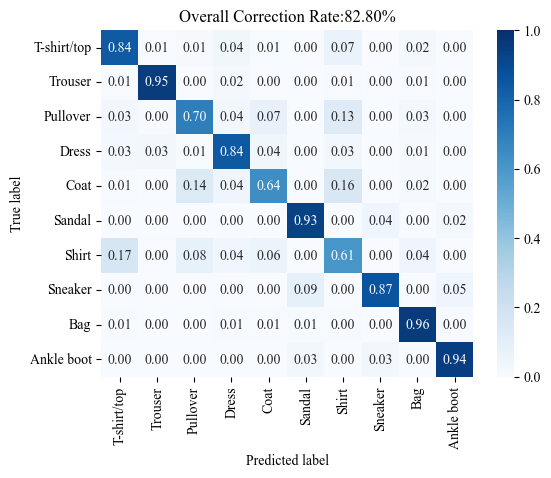

5/5th Epoch:10/10(100.00%) 

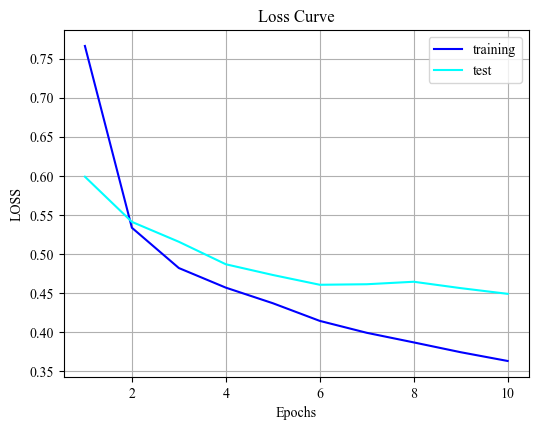

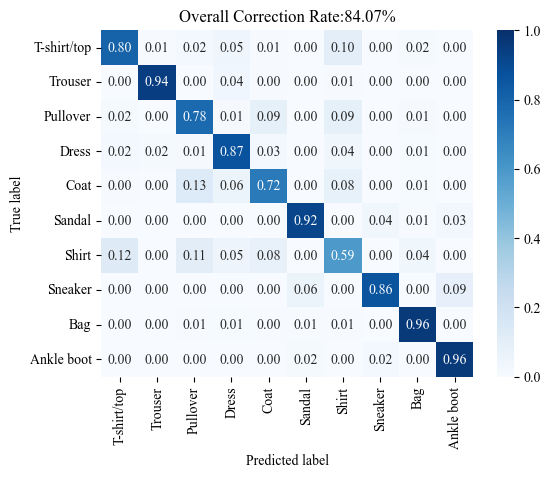

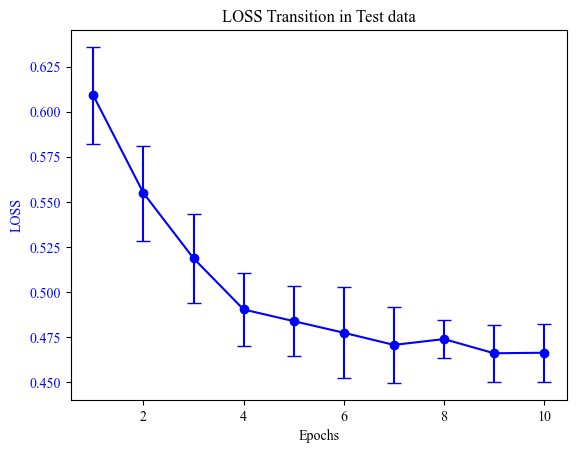

1/5th Epoch:1/10(1.00%) 

            Average  Best ID        Best  Worst ID       Worst
0   ACC   83.168000        5   84.070000         1   82.660000
1  LOSS    0.466291        2    0.445245         4    0.485808
2  TIME  131.475271        4  119.924290         2  141.783735
----------------------Running with leverage: 16----------------------


1/5th Epoch:10/10(100.00%) 

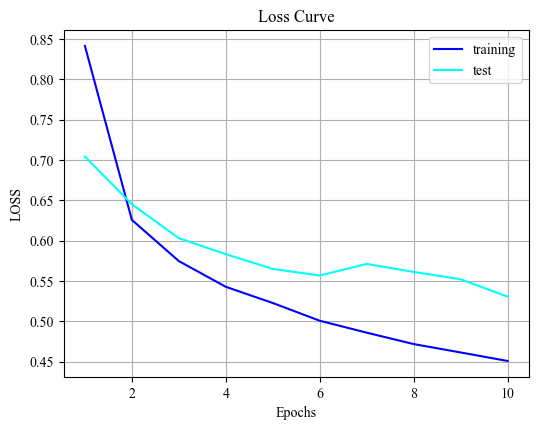

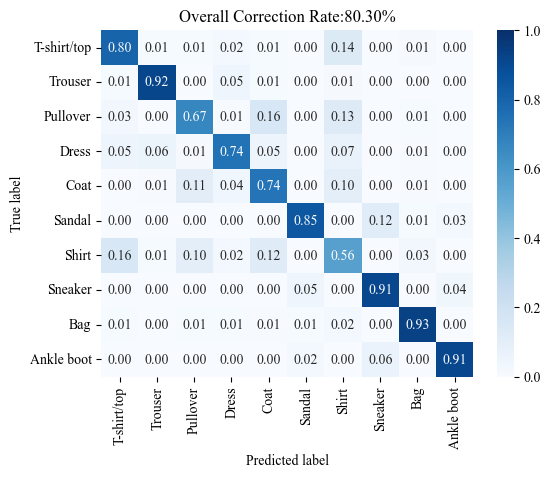

2/5th Epoch:10/10(100.00%) 

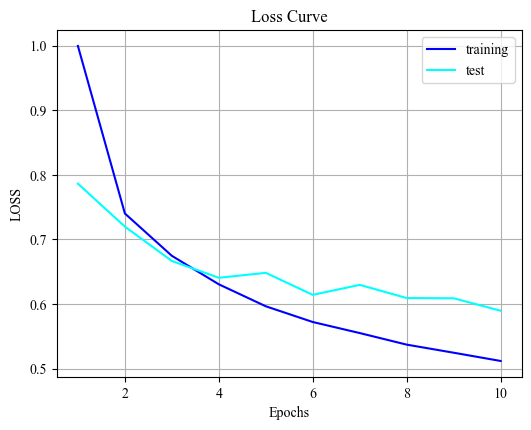

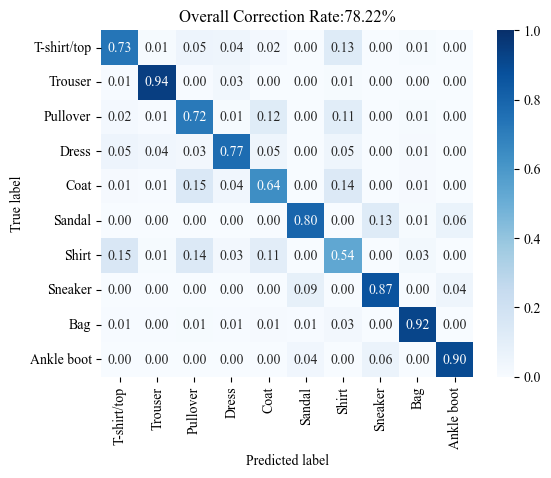

3/5th Epoch:10/10(100.00%) 

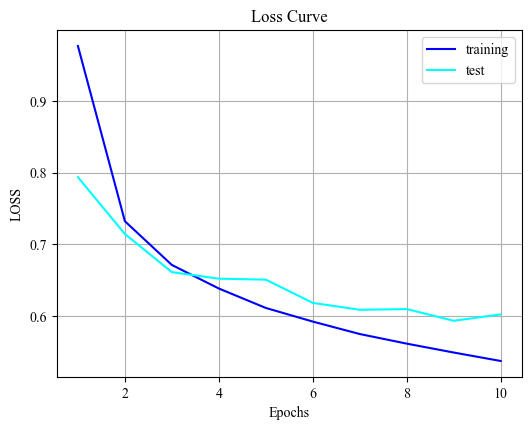

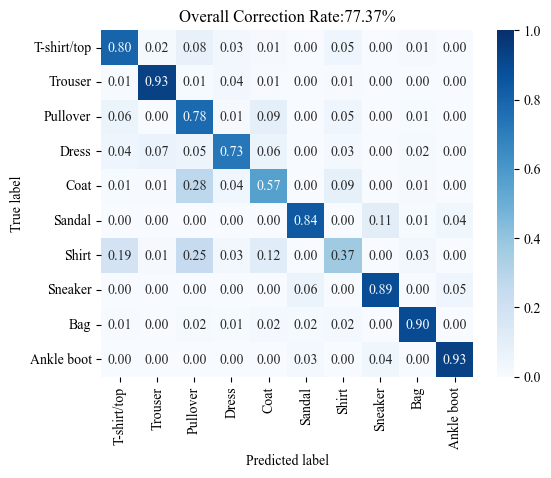

4/5th Epoch:6/10(100.00%) 

In [ ]:
#data---------------------------------------------
dataset = 'fashion-mnist' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'PM' # 'none', 'MZM', 'LI'
cls_type = 'CNN' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 5
max_epochs = 10
leverages = [1,2,4,8,16] #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}_VCR'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

results = []
All_last_LOSSs_ = []
All_last_ACCs_ = []
for leverage in leverages:
    print(f'----------------------Running with leverage: {leverage}----------------------')
    All_last_loss = []
    All_loss_test = []
    All_pro_time = []
    All_test_acc = []
    for num_times in range(num_try):

        loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

        All_loss_test.append(loss_test_)
        All_pro_time.append(sum(pro_time_))
        All_last_loss.append(Last_loss_test)
        All_test_acc.append(Test_acc)

        plot_loss_curve(loss_train_,loss_test_)
        plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

    plot_errorbar_losscurve(All_loss_test)
    create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_last_LOSSs_,All_last_ACCs_)